In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori

In [42]:
filepath = '../preprocessed_supermarket.xlsx'
df = pd.read_excel(filepath)
df = df[['订单编号','子类别']]
print(df.head())

      订单编号  子类别
0  1357144   用品
1  1973789   信封
2  1973789  装订机
3  3017568   用品
4  2975416   器具


## 数据预处理

In [43]:
basket_df = df.pivot_table(index='订单编号', columns='子类别', aggfunc=lambda x: 1, fill_value=0)
print(basket_df)

子类别      书架  信封  器具  复印机  收纳具  标签  桌子  椅子  用具  用品  电话  系固件  纸张  美术  装订机  设备  \
订单编号                                                                          
1007278   1   1   1    0    1   1   0   1   1   1   0    0   0   0    1   0   
1015819   0   0   0    0    1   0   0   0   0   1   1    0   0   0    0   1   
1017090   0   0   0    1    1   1   0   0   1   0   0    1   1   0    0   1   
1021233   0   0   0    0    0   0   1   0   1   1   1    0   0   1    1   0   
1031662   1   0   1    1    1   1   1   1   1   0   0    1   0   1    0   1   
...      ..  ..  ..  ...  ...  ..  ..  ..  ..  ..  ..  ...  ..  ..  ...  ..   
5950580   1   0   0    0    1   1   0   0   1   0   0    0   1   1    0   0   
5956361   1   1   1    1    1   0   1   1   1   0   1    1   1   1    1   1   
5956912   0   1   1    0    1   0   0   1   1   1   0    0   0   1    1   0   
5960733   1   1   0    0    1   1   0   1   0   0   0    0   0   0    1   1   
5966135   0   1   1    1    0   0   0   1   1   0   

In [44]:
# 使用sum函数对每行进行求和，然后筛选出和大于1的行
basket_df = basket_df[basket_df.sum(axis=1) > 1]
print(basket_df)

子类别      书架  信封  器具  复印机  收纳具  标签  桌子  椅子  用具  用品  电话  系固件  纸张  美术  装订机  设备  \
订单编号                                                                          
1007278   1   1   1    0    1   1   0   1   1   1   0    0   0   0    1   0   
1015819   0   0   0    0    1   0   0   0   0   1   1    0   0   0    0   1   
1017090   0   0   0    1    1   1   0   0   1   0   0    1   1   0    0   1   
1021233   0   0   0    0    0   0   1   0   1   1   1    0   0   1    1   0   
1031662   1   0   1    1    1   1   1   1   1   0   0    1   0   1    0   1   
...      ..  ..  ..  ...  ...  ..  ..  ..  ..  ..  ..  ...  ..  ..  ...  ..   
5950580   1   0   0    0    1   1   0   0   1   0   0    0   1   1    0   0   
5956361   1   1   1    1    1   0   1   1   1   0   1    1   1   1    1   1   
5956912   0   1   1    0    1   0   0   1   1   1   0    0   0   1    1   0   
5960733   1   1   0    0    1   1   0   1   0   0   0    0   0   0    1   1   
5966135   0   1   1    1    0   0   0   1   1   0   

## Apriori

      support             itemsets
0    0.433884                 (书架)
1    0.455579                 (信封)
2    0.425620                 (器具)
3    0.417355                (复印机)
4    0.525826                (收纳具)
..        ...                  ...
497  0.101240   (电话, 椅子, 装订机, 收纳具)
498  0.110537  (装订机, 椅子, 系固件, 收纳具)
499  0.104339   (椅子, 装订机, 收纳具, 纸张)
500  0.106405   (美术, 椅子, 装订机, 收纳具)
501  0.102273   (配件, 装订机, 收纳具, 椅子)

[502 rows x 2 columns]
     support        itemsets
0   0.433884            (书架)
1   0.455579            (信封)
2   0.425620            (器具)
3   0.417355           (复印机)
4   0.525826           (收纳具)
..       ...             ...
83  0.259298      (装订机, 系固件)
84  0.245868       (装订机, 纸张)
85  0.264463       (美术, 装订机)
86  0.250000       (配件, 装订机)
87  0.213843  (椅子, 装订机, 收纳具)

[88 rows x 2 columns]
     support    itemsets
0   0.433884        (书架)
1   0.455579        (信封)
2   0.425620        (器具)
3   0.417355       (复印机)
4   0.525826       (收纳具)
5   0.430785        (标签)
6   0.5609

/Users/helinwang/opt/anaconda3/envs/pytorch/lib/python3.11/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/Users/helinwang/opt/anaconda3/envs/pytorch/lib/python3.11/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/Users/helinwang/opt/anaconda3/envs/pytorch/lib/python3.11/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/Users/helinwang/opt/anaconda3/envs/pytorch/lib/p

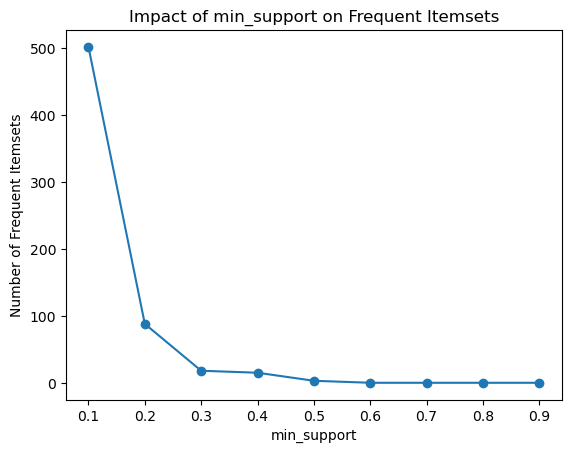

In [46]:
# 设置不同的 min_support 值
min_support_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# 绘制折线图
frequent_itemset_counts = []
for min_support in min_support_values:
    frequent_itemsets = apriori(basket_df, min_support=min_support, use_colnames=True)
    print(frequent_itemsets)
    frequent_itemset_counts.append(len(frequent_itemsets))

plt.plot(min_support_values, frequent_itemset_counts, marker='o')
plt.xlabel('min_support')
plt.ylabel('Number of Frequent Itemsets')
plt.title('Impact of min_support on Frequent Itemsets')
plt.show()

In [50]:
min_sup=0.3
frequent_itemsets = apriori(basket_df, min_support=min_sup, use_colnames=True)
print(frequent_itemsets)

     support    itemsets
0   0.433884        (书架)
1   0.455579        (信封)
2   0.425620        (器具)
3   0.417355       (复印机)
4   0.525826       (收纳具)
5   0.430785        (标签)
6   0.560950        (椅子)
7   0.435950        (用具)
8   0.445248        (用品)
9   0.430785        (电话)
10  0.419421       (系固件)
11  0.408058        (纸张)
12  0.416322        (美术)
13  0.578512       (装订机)
14  0.410124        (配件)
15  0.317149   (椅子, 收纳具)
16  0.325413  (装订机, 收纳具)
17  0.354339   (椅子, 装订机)


/Users/helinwang/opt/anaconda3/envs/pytorch/lib/python3.11/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [60]:
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.1)
print(rules)

  antecedents consequents  antecedent support  consequent support   support  \
0        (椅子)       (收纳具)            0.560950            0.525826  0.317149   
1       (收纳具)        (椅子)            0.525826            0.560950  0.317149   
2       (装订机)       (收纳具)            0.578512            0.525826  0.325413   
3       (收纳具)       (装订机)            0.525826            0.578512  0.325413   
4        (椅子)       (装订机)            0.560950            0.578512  0.354339   
5       (装订机)        (椅子)            0.578512            0.560950  0.354339   

   confidence      lift  leverage  conviction  zhangs_metric  
0    0.565378  1.075217  0.022186    1.091001       0.159333  
1    0.603143  1.075217  0.022186    1.106318       0.147531  
2    0.562500  1.069745  0.021216    1.083825       0.154684  
3    0.618861  1.069745  0.021216    1.105862       0.137497  
4    0.631676  1.091897  0.029822    1.144339       0.191693  
5    0.612500  1.091897  0.029822    1.133031       0.199680  
